1.导入包及定义文件路径

In [1]:
"""
初始化文件
导入所有的模块
创建文件夹
"""
import os

from rdkit import Chem
from rdkit import DataStructs

from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors

# 定义文件路径
data_path = "data"          # 数据存储路径
result_path = "output"      # 结果存储路径

# os.makedirs()函数创建文件夹，exist_ok参数为True表示如果文件夹已存在则不报错
os.makedirs(data_path, exist_ok=True)
os.makedirs(result_path, exist_ok=True)

2.分子读取

变量 sdf 的类型是： <class 'rdkit.Chem.rdmolfiles.SDMolSupplier'>
变量 mol 的类型是： <class 'rdkit.Chem.rdchem.Mol'>


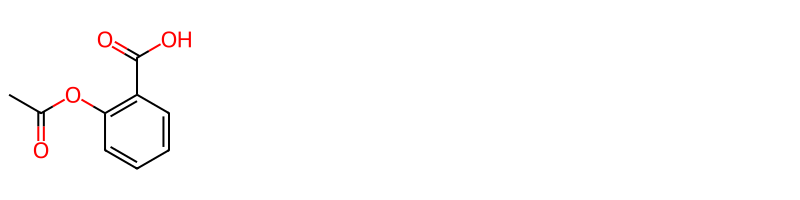

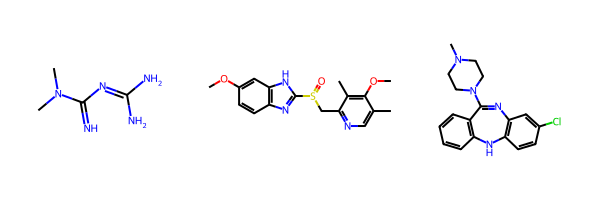

In [2]:
"""
分子读取示例:
1. 需要用到 os 模块、rdkit 中的 Chem 模块、Chem 中的 Draw 模块。
2. 使用 os.path.join() 函数拼接文件路径。
3. 使用 Chem 中的 MolFromSmiles()、MolFromMolFile()、MolFromMol2File()、SDMolSupplier() 等函数读取分子信息。
4. 使用 type() 函数查看变量类型。
5. 使用 Draw 中的 MolsToGridImage() 函数可视化分子信息。
"""

# 从 SMILES 字符串中读取二甲双胍分子信息
smi = Chem.MolFromSmiles('CN(C)C(=N)N=C(N)N')

# 使用 os.path.join() 函数拼接文件路径
aspirin_path = os.path.join(data_path, "Aspirin.sdf")        # 阿司匹林 SDF 文件存放路径
omeprazole_path = os.path.join(data_path, "Omeprazole.mol")  # 奥美拉唑 MOL 文件存放路径
clozapine_path = os.path.join(data_path, "Clozapine.mol2")   # 氯氮平 MOL2 文件存放路径

# 从文件中读取分子信息
sdf = Chem.SDMolSupplier(aspirin_path)          # 从 SDF 文件中读取阿司匹林分子信息
mol = Chem.MolFromMolFile(omeprazole_path)      # 从 MOL 文件中读取奥美拉唑分子信息
mol2 = Chem.MolFromMol2File(clozapine_path)     # 从 MOL2 文件中读取氯氮平分子信息

# 查看变量类型
print("变量 sdf 的类型是：", type(sdf))
print("变量 mol 的类型是：", type(mol))

# 可视化 SDF 分子信息，使用列表推导式避免 SDF 读取错误
img = Draw.MolsToGridImage([mol for mol in sdf if mol], molsPerRow=4, subImgSize=(200, 200))
display(img)  # Jupyter Notebook 中显示图片的独有方式

# 可视化多个分子
img_grid = Draw.MolsToGridImage([smi, mol, mol2], molsPerRow=3, subImgSize=(200, 200))
display(img_grid)


3.格式转换

（1）SMILES转换为mol：

mol 对象的类型为： <class 'rdkit.Chem.rdchem.Mol'>


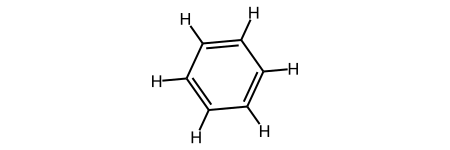

In [3]:
"""
SMILES 转换为 MOL 文件示例:
1. 需要用到 os 模块、RDKit 中的 Chem 模块、AllChem 模块。
2. 使用 Chem 中的 MolFromSmiles() 函数读取分子信息。
3. 使用 AllChem 中的 AddHs() 函数添加氢原子，EmbedMolecule() 函数生成三维坐标，MMFFOptimizeMolecule() 函数进行几何优化。
4. 使用 os.path.join() 函数拼接文件路径。
5. 使用 Chem 中的 MolToMolFile() 函数将分子对象写入 MOL 文件，接收两个参数，分别是分子对象和需要保存的文件名路径。
6. 使用 type() 函数查看变量类型。
"""

smiles = 'c1ccccc1'                     # 初始化苯分子的 SMILES 字符串
mol = Chem.MolFromSmiles(smiles)        # 根据 SMILES 字符串创建分子对象
mol = AllChem.AddHs(mol)                # 向分子中添加氢原子
AllChem.EmbedMolecule(mol)              # 为分子生成三维坐标
AllChem.MMFFOptimizeMolecule(mol)       # 使用MMFF94力场对分子进行几何优化
benzene_path = os.path.join(result_path, "Benzene.mol")      # 结果文件的保存路径
Chem.MolToMolFile(mol, benzene_path)    # 将分子对象保存为.mol文件
print("mol 对象的类型为：", type(mol))   # 打印分子对象的类型
mol                                     # 显示分子对象（在交互式环境中）

（2）SMILES转换为sdf

['C[C@@H]1CC(=O)N2C[C@H](c3nc(-c4ccc(C(=O)Nc5cc(C(F)(F)F)ccn5)cc4)c4c(N)nccn34)CC[C@H]12\tCHEMBL4113670\n',
 'C#CC(=O)N[C@H]1CCCN(c2c(F)cc(C(N)=O)c3[nH]c(C)c(C)c23)C1\tCHEMBL4648442\n',
 'Nc1nccn2c([C@@H]3CC[C@H]4CCOC(=O)N4C3)nc(-c3ccc(C(=O)Nc4cc(C(F)(F)F)ccn4)cc3)c12\tCHEMBL4113445\n',
 'C=CS(=O)(=O)Nc1cccc(-c2ccc(C(N)=O)c3[nH]c4c(c23)CCC(C(C)(C)O)C4)c1C\tCHEMBL4240879\n',
 'Nc1nccn2c([C@@H]3CC[C@H]4C[C@H](O)C(=O)N4C3)nc(-c3ccc(C(=O)Nc4cc(C(F)(F)F)ccn4)cc3)c12\tCHEMBL4109744\n',
 'Nc1nccn2c([C@@H]3CC[C@H]4COC(=O)N4C3)nc(-c3ccc(C(=O)Nc4cc(C(F)(F)F)ccn4)cc3)c12\tCHEMBL4749037\n',
 'Nc1nccn2c([C@@H]3CC[C@H]4COC(=O)N4C3)nc(-c3ccc(C(=O)Nc4cc(C(F)(F)F)ccn4)cc3F)c12\tCHEMBL4109282\n',
 'C[C@H]1CC(=O)N2C[C@H](c3nc(-c4ccc(C(=O)Nc5cc(C(F)(F)F)ccn5)cc4)c4c(N)nccn34)CC[C@@H]12\tCHEMBL3938520\n',
 'CC(C)(C)c1cc(F)c2c(=O)n(-c3cccc(-n4cc(C(N)=O)c(Nc5ccc(S(C)(=O)=O)cc5)n4)c3CO)ncc2c1\tCHEMBL3652656\n',
 'CN1CCn2nc(Nc3nn(-c4cccc(-n5ncc6cc(C(C)(C)C)cc(F)c6c5=O)c4CO)cc3C(N)=O)cc2C1\tCHEMBL3652654\n',
 '

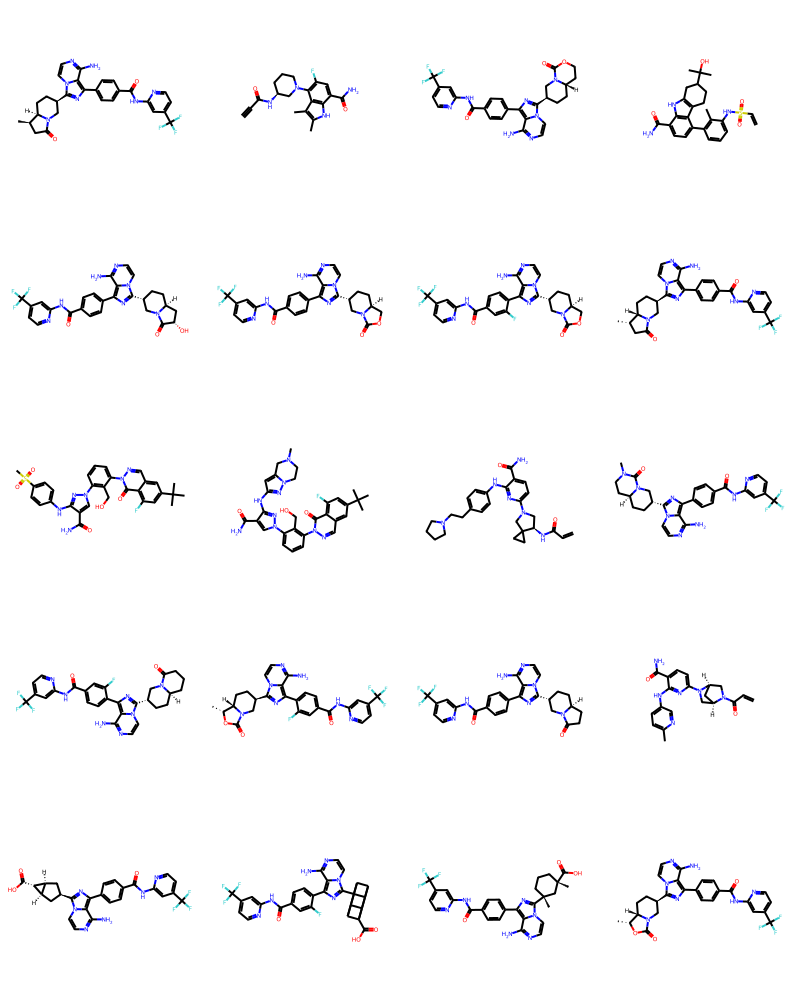

SDF 文件已经生成！


In [4]:
"""
SMILES 转换为 SDF 示例：
1. 需要用到 os 模块、RDKit 中的 Chem 模块、Draw 模块。
2. 使用 os.path.join() 函数拼接文件路径。
3. 使用 with 语句确保所有数据正确写入并且文件正确关闭。
4. 使用 Chem 中的 MolFromSmiles() 函数读取分子信息。
5. 使用 Draw 中的 MolsToGridImage() 函数可视化分子信息。
6. 使用 Chem 中的 SDWriter() 函数将分子对象列表写入 SDF 文件。
"""

# 定义 SMILES 输入文件和 SDF 输出文件路径
smiles_file_path = os.path.join(data_path, 
                                "20smiles.smi")            
sdf_file_path = os.path.join(result_path, 
                             "20smiles_convert.sdf")  

# 打开并读取包含 SMILES 字符串的文件
with open(smiles_file_path, 'r') as f:
    smiles_list = f.readlines()  # 读取文件中的所有行

# 显示读取的 SMILES 字符串列表
display(smiles_list)

# 创建分子对象列表
mols = []  # 初始化一个空列表用于存储分子对象
for smiles in smiles_list:
    mol = Chem.MolFromSmiles(smiles.strip())
    mols.append(mol)  # 将分子对象添加到列表中

# 可视化分子对象
img = Draw.MolsToGridImage(mols, molsPerRow=4, 
                           subImgSize=(200, 200))
display(img)

# 将分子对象列表写入 SDF 文件
with Chem.SDWriter(sdf_file_path) as writer:  # 创建一个 SDF 文件写入对象
    for mol in mols:
        if mol is not None:
            writer.write(mol)  # 将每个非空的分子对象写入 SDF 文件

# 打印提示信息
print("SDF 文件已经生成！")

（3）sdf转换为SMILES

In [5]:
"""
SDF 转换为 SMILES 示例：
1. 需要用到 os 模块、RDKit 中的 Chem 模块。
2. 使用 os.path.join() 函数拼接文件路径。
3. 使用 Chem 中的 SDMolSupplier() 函数读取分子信息。
4. 使用 with 语句确保所有数据正确写入并且文件正确关闭。
5. 使用 Chem 中的 MolToSmiles() 函数进行分子格式转换。
"""

# 定义输入的 SDF 文件路径和输出的 SMI 文件路径
input_sdf_file_path = os.path.join(data_path, 
                                   "20sdf.sdf")
output_smi_file_path = os.path.join(result_path, 
                                    "20sdf_convert.smi")

# 从 SDF 文件中读取分子信息，sanitize=False 表示不进行分子的清洗
mols = Chem.SDMolSupplier(input_sdf_file_path, sanitize=False)

# 打开输出文件以写入 SMILES 字符串
with open(output_smi_file_path, "w") as out_file:
    for i, mol in enumerate(mols, start=1):  # 使用 enumerate() 进行迭代并计数
        if mol is not None:  # 确保分子对象不为 None
            smiles = Chem.MolToSmiles(mol)  # 将分子对象转换为 SMILES 字符串
            name = mol.GetProp("_Name")  # 获取分子对象的名称属性
            message = f"{smiles}\t{name}\n"  # 构建输出信息字符串
            print(f"写入的第{i}个分子信息为： {message}")  # 打印信息
            out_file.write(message)  # 将 SMILES 字符串和分子名称写入文件

# 打印提示信息
print("SMILES 文件已经生成！")

写入的第1个分子信息为： C[C@@H]1CC(=O)N2C[C@H](/C3=N/C(C4=CC=C(C(=O)NC5=CC(C(F)(F)F)=CC=N5)C=C4)=C4/C(N)=NC=CN34)CC[C@H]12	CHEMBL4113670

写入的第2个分子信息为： C#CC(=O)N[C@H]1CCCN(/C2=C(F)/C=C(/C(N)=O)C3=C2C(C)=C(C)N3)C1	CHEMBL4648442

写入的第3个分子信息为： N/C1=N/C=C\N2C([C@@H]3CC[C@H]4CCOC(=O)N4C3)=NC(C3=CC=C(C(=O)NC4=CC(C(F)(F)F)=CC=N4)C=C3)=C12	CHEMBL4113445

写入的第4个分子信息为： C=CS(=O)(=O)NC1=CC=CC(/C2=C/C=C(/C(N)=O)C3=C2C2=C(CC(C(C)(C)O)CC2)N3)=C1C	CHEMBL4240879

写入的第5个分子信息为： N/C1=N/C=C\N2C([C@@H]3CC[C@H]4C[C@H](O)C(=O)N4C3)=NC(C3=CC=C(C(=O)NC4=CC(C(F)(F)F)=CC=N4)C=C3)=C12	CHEMBL4109744

写入的第6个分子信息为： N/C1=N/C=C\N2C([C@@H]3CC[C@H]4COC(=O)N4C3)=NC(C3=CC=C(C(=O)NC4=CC(C(F)(F)F)=CC=N4)C=C3)=C12	CHEMBL4749037

写入的第7个分子信息为： N/C1=N/C=C\N2C([C@@H]3CC[C@H]4COC(=O)N4C3)=NC(C3=CC=C(C(=O)NC4=CC(C(F)(F)F)=CC=N4)C=C3F)=C12	CHEMBL4109282

写入的第8个分子信息为： C[C@H]1CC(=O)N2C[C@H](/C3=N/C(C4=CC=C(C(=O)NC5=CC(C(F)(F)F)=CC=N5)C=C4)=C4/C(N)=NC=CN34)CC[C@@H]12	CHEMBL3938520

写入的第9个分子信息为： CC(C)(C)C1=C\C(F)=C2\C(=O)N(C3=CC=CC(N4C=C(C(N)=O)C(N

（4）合并多个mol2为一个sdf

In [6]:
"""
合并多个 MOL2 为一个 SDF 示例：
1. 需要用到 os 模块、RDKit 中的 Chem 模块。
2. 使用 def 关键字定义函数。
3. 使用 for 循环遍历输入文件夹中的 mol2 文件。
4. 使用 os.listdir() 函数获取文件名，使用 os.path.join() 函数拼接文件路径。
5. 使用 Chem 中的 MolFromMol2File() 函数读取分子信息，SDWriter() 函数将分子对象列表写入 SDF 文件。
"""
# 使用def()创建合并函数，输入和输出作为参数
def merge_mol2_to_sdf(input_dir, output_file):
    writer = Chem.SDWriter(output_file)    # 创建一个待写入 SDF 文件的对象
    input_file_list = os.listdir(input_dir) # 获取输入文件夹中的所有文件名
    for filename in input_file_list:    # 遍历文件夹中的所有文件
        if filename.endswith('.mol2'):  # 判断文件是否为 mol2 格式
            filepath = os.path.join(input_dir, filename)  # 拼接文件路径
            # 读取 mol2 文件中的分子信息，不进行分子清洗和去氢
            mol = Chem.MolFromMol2File(filepath, sanitize=False, 
                                       removeHs=False)
            writer.write(mol)  # 将分子写入 SDF 文件
    writer.close()  # 关闭 SDF 写入对象
    print("所有的 mol2 文件已经合并。保存路径: ", output_file)  # 打印提示信息

# 定义输入文件夹路径和输出文件路径
input_dir_path = os.path.join(data_path, "mols")
output_file_path = os.path.join(result_path, 
                                "merged_output.sdf")

# 调用合并函数，执行合并操作
merge_mol2_to_sdf(input_dir_path, output_file_path)

所有的 mol2 文件已经合并。保存路径:  output\merged_output.sdf


4.描述符生成

Molecular weight: 78.11399999999999
logP: 1.6866
Topological polar surface area (TPSA): 0.0
Molecular volume: 83.06400000000002


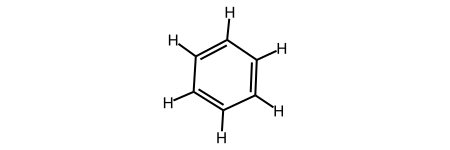

In [7]:
"""
描述符生成示例：
1. 需要用到 RDKit 中的 Chem 模块、Descriptors 模块和 AllChem 模块。
2. 使用 MolFromSmiles() 函数读取分子信息。
3. 使用 Descriptors 模块计算分子的各种描述符。
"""
mol = Chem.MolFromSmiles('c1ccccc1')        # 从SMILES字符串中读取分子信息
mw = Descriptors.MolWt(mol)                 # 计算分子量
logP = Descriptors.MolLogP(mol)             # 计算logP值
tpsa = Descriptors.TPSA(mol)                # 计算分子的拓扑极性表面积
mol = Chem.AddHs(mol)                       # 为分子添加氢原子
AllChem.EmbedMolecule(mol)                  # 为分子生成三维坐标
conf = mol.GetConformer()                   # 获取分子的构象
volume = AllChem.ComputeMolVolume(mol, confId=0)  # 计算分子的三维结构体积

# 打印分子的属性值
print("Molecular weight:", mw)
print("logP:", logP)
print("Topological polar surface area (TPSA):", tpsa)
print("Molecular volume:", volume)

# 显示分子对象（在交互式环境中）
mol    

5.分子指纹提取

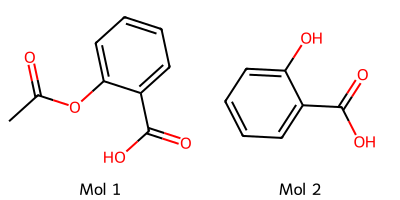

Similarity: 0.4482758620689655


In [8]:
"""
分子指纹提取示例：
1. 需要用到 RDKit 中的 Chem 和 DataStructs 模块、Chem 中的 AllChem 和 Draw 模块。
2. 使用 MolFromSmiles() 函数读取分子信息。
3. 使用 GetMorganFingerprintAsBitVect() 函数生成分子的 Morgan 指纹，定义分子对象和半径。
4. 使用 TanimotoSimilarity() 函数计算两个指纹之间的 Tanimoto 相似性。
5. 使用 Draw 中的 MolsToGridImage() 函数可视化分子信息。
"""
# 读取分子（例为阿司匹林与水杨酸）
mol1 = Chem.MolFromSmiles('CC(=O)OC1=CC=CC=C1C(=O)O')
mol2 = Chem.MolFromSmiles('O=C(O)c1ccccc1O')

# 生成分子的Morgan指纹（半径为2，即直径为4的圆形指纹ECFP4）
fp1 = AllChem.GetMorganFingerprintAsBitVect(mol1, 2)
fp2 = AllChem.GetMorganFingerprintAsBitVect(mol2, 2)

# 计算指纹之间的相似性
similarity = DataStructs.TanimotoSimilarity(fp1, fp2)

# 绘制分子
img = Draw.MolsToGridImage([mol1, mol2], molsPerRow=2, 
                           subImgSize=(200, 200),
                           legends=[f"Mol 1", "Mol 2"])
display(img)

# 打印相似性
print(f"Similarity: {similarity}")

6.子结构提取

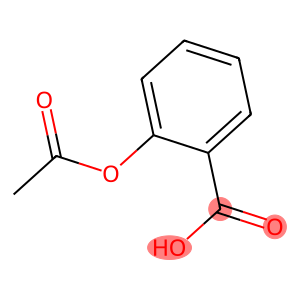

羧基基团的匹配数: 1


In [9]:
"""
子结构提取示例：
1. 需要用到 RDKit 中的 Chem 模块、Draw 模块。
2. 使用 Chem 中的 MolFromSmiles() 函数读取分子信息，MolFromSmarts() 函数定义子结构。
3. 使用 GetSubstructMatches() 方法在分子中查找子结构。
4. 使用 Draw 中的 MolToImage() 函数绘制分子结构。
"""

# 读取分子信息（阿司匹林）
mol = Chem.MolFromSmiles('CC(=O)OC1=CC=CC=C1C(=O)O')

# 定义羧基基团的子结构（C(=O)[OH]表示羧基）
substructure = Chem.MolFromSmarts('C(=O)[OH]')

# 在分子中查找羧基基团
matches = mol.GetSubstructMatches(substructure)

# 展平匹配结果，生成一个包含所有匹配原子索引的列表
highlight_atoms = [atom for match in matches
                   for atom in match]

# 绘制分子结构并高亮匹配的子结构
img = Draw.MolToImage(mol, 
                      highlightAtoms=highlight_atoms 
                      if highlight_atoms else None)

# 在 Jupyter Notebook 中显示图像
display(img)

# 打印匹配结果
print(f"羧基基团的匹配数: {len(matches)}")